# Data Analytics Process: An example with the Titanic dataset

In this notebook we do a demonstration of different phases in the data analytics process

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

## 1. Define a Question or a Problem to be solved

### Question: 
### *Which variables were associated with survival in the Titanic*

## 2. Data Acquisition

In [2]:
# Let's get some data
path_to_file = '..\\datasets\\titanic\\titanic.csv'
titanic = pd.DataFrame.from_csv(path=path_to_file, index_col=None)

### Know your data set

* What do you have en every row?
* What do you have in every column?
* What are the types of values you have?
* How big is the data set?
* Many other questions...

In [3]:
titanic.shape

(1310, 14)

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
pclass       1309 non-null float64
survived     1309 non-null float64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null float64
parch        1309 non-null float64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [5]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## 3. Data Wrangling

### Cleaning the data

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
pclass       1309 non-null float64
survived     1309 non-null float64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null float64
parch        1309 non-null float64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [11]:
titanic.tail()

,pclass,survived,name,sex,age,sibsp,parch,fare,cabin,embarked
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5,1.0,0.0,14.4542,NaN,C
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,14.4542,NaN,C
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,7.2250,NaN,C
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,7.2250,NaN,C
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,7.8750,NaN,S


In [8]:
# Rows that have less than 5 not null
titanic[titanic.notnull().sum(axis=1)<5]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Get rid of columns (variables, features) that are not useful and rows that contain no data.

In [12]:
#Droping columns
titanic.drop(['ticket','boat','body','home.dest'], axis=1, inplace=True)
#Droping rows
titanic.drop([1309], axis=0, inplace=True)

ValueError: labels ['ticket' 'boat' 'body' 'home.dest'] not contained in axis

In [ ]:
titanic.info()

### Feature Engineering

In [13]:
# We migth want to explore if people who were traveling alone had a different chance of survival
# Creating the "alone" variable (1 if alone)
titanic['alone'] =  titanic["parch"] + titanic["sibsp"]
titanic['alone'].ix[titanic['alone'] == 0] = 'Alone'
titanic['alone'].ix[titanic['alone'] != 'Alone'] = 'With Family'

C:\Users\Alvaro\AppData\Local\Dato\Dato Launcher\lib\site-packages\pandas\core\indexing.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [14]:
# Transforming variable types
# example
titanic['pclass'] = titanic['pclass'].astype(int)

In [15]:
print titanic['pclass'].dtype

int32


### Missing value imputation

In [16]:
titanic['age'].fillna(titanic['age'].median(), inplace=True)
titanic['embarked'].fillna(titanic['embarked'].value_counts().idxmax(), inplace=True)

## 4. Data Exploration

In [17]:
for x in titanic.columns:
    print x,

pclass survived name sex age sibsp parch fare cabin embarked alone


### Univariate exploration

In [18]:
titanic.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,0.381971,29.503183,0.498854,0.385027,33.295479
std,0.837836,0.486055,12.905246,1.041658,0.865560,51.758668
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


#### Survived Variable

In [19]:
titanic['survived'].value_counts()

0.0    809
1.0    500
Name: survived, dtype: int64

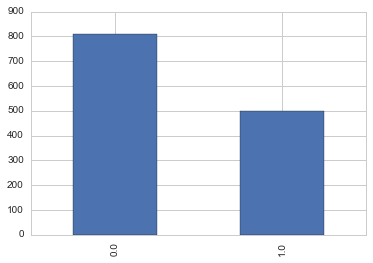

In [20]:
titanic['survived'].value_counts().plot(kind='bar')

In [21]:
titanic['survived'].mean() # only about 38% of the people suvived

0.3819709702062643

#### Age variable

In [22]:
titanic['age'].describe()

count    1309.000000
mean       29.503183
std        12.905246
min         0.166700
25%        22.000000
50%        28.000000
75%        35.000000
max        80.000000
Name: age, dtype: float64

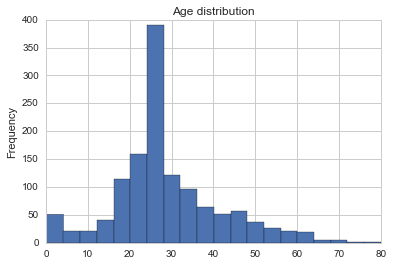

In [23]:
fig, ax = plt.subplots()
titanic['age'].plot(kind='hist', bins = 20, ax=ax)
ax.set_title('Age distribution')

### Exploring relationships

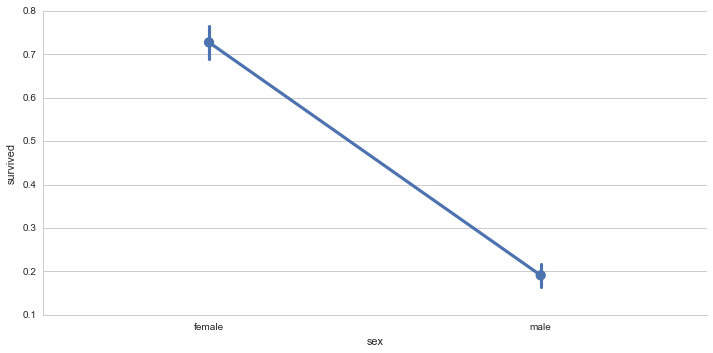

In [24]:
sns.factorplot(y='survived', x='sex', data=titanic, size=5, aspect=2)

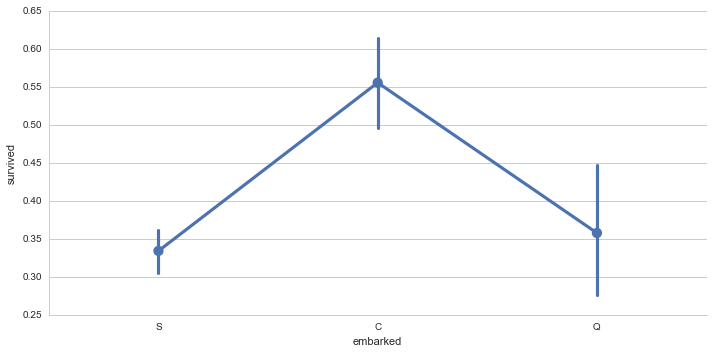

In [25]:
sns.factorplot(y= 'survived', x='embarked', data=titanic, size=5, aspect=2)

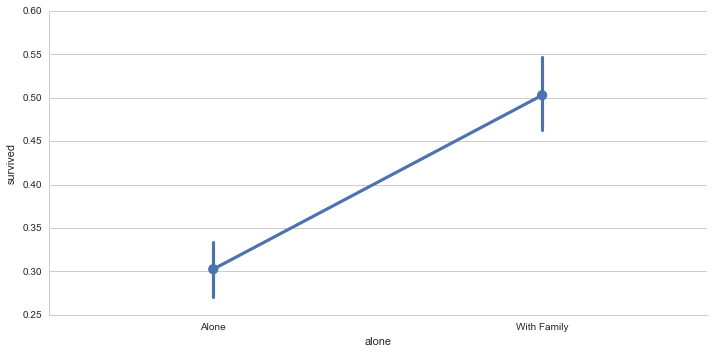

In [26]:
sns.factorplot(y= 'survived', x='alone', data=titanic, size=5, aspect=2)

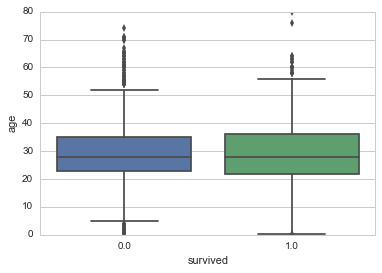

In [27]:
sns.boxplot(x='survived', y='age', data=titanic)

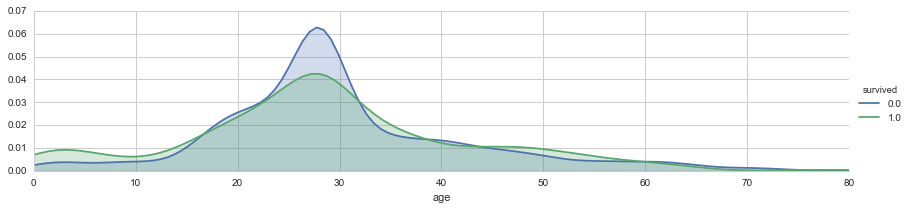

In [28]:
facet = sns.FacetGrid(titanic, hue="survived",aspect=4)
facet.map(sns.kdeplot,'age', shade= True)
facet.set(xlim=(0, titanic['age'].max()))
facet.add_legend()

## 5. Modelling

Choose a model that will help you to answer the question

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
titanic.columns

Index([u'pclass', u'survived', u'name', u'sex', u'age', u'sibsp', u'parch',
       u'fare', u'cabin', u'embarked', u'alone'],
      dtype='object')

In [31]:
# Again some wrangling is necessary before modelling
titanic['alone2'] = 0
titanic['alone2'].ix[titanic['alone']=='Alone'] = 1
titanic['male'] = pd.get_dummies(titanic['sex'], prefix='gender', drop_first=True)
titanic = pd.concat([titanic, pd.get_dummies(titanic['embarked'], prefix='embarked', drop_first=True)], axis=1)

In [32]:
titanic.columns

Index([u'pclass', u'survived', u'name', u'sex', u'age', u'sibsp', u'parch',
       u'fare', u'cabin', u'embarked', u'alone', u'alone2', u'male',
       u'embarked_Q', u'embarked_S'],
      dtype='object')

In [33]:
features = ['pclass','male','age','alone2','embarked_Q','embarked_S']
X = titanic[features].values
y = titanic['survived'].values

In [34]:
rf_model = RandomForestClassifier(random_state=124)
rf_model.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=124, verbose=0, warm_start=False)

In [35]:
rf_model.feature_importances_

array([ 0.13940956,  0.3421581 ,  0.44866738,  0.03138736,  0.0123244 ,
        0.0260532 ])

In [36]:
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("Rank: {}, {}, {:0.3f}".format(f + 1, features[indices[f]], importances[indices[f]]))

Feature ranking:
Rank: 1, age, 0.449
Rank: 2, male, 0.342
Rank: 3, pclass, 0.139
Rank: 4, alone2, 0.031
Rank: 5, embarked_S, 0.026
Rank: 6, embarked_Q, 0.012


In [37]:
list(pd.Series(features)[indices])

['age', 'male', 'pclass', 'alone2', 'embarked_S', 'embarked_Q']

(-1, 6L)

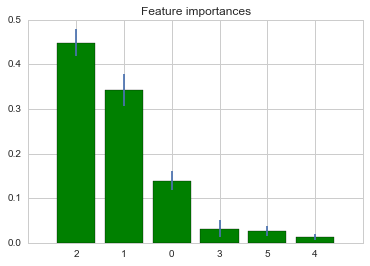

In [38]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])

In [39]:
rf_model2 = RandomForestClassifier(random_state=124, min_samples_leaf=10)
rf_model2.fit(X,y)

importances2 = rf_model2.feature_importances_
std2 = np.std([tree.feature_importances_ for tree in rf_model2.estimators_], axis=0)
indices2 = np.argsort(importances2)[::-1]

# Print the feature ranking
print("Feature ranking, model 2:")
for f in range(X.shape[1]):
    print("Rank: {}, {}, {:0.3f}".format(f + 1, features[indices2[f]], importances2[indices2[f]]))

Feature ranking, model 2:
Rank: 1, male, 0.556
Rank: 2, age, 0.184
Rank: 3, pclass, 0.184
Rank: 4, alone2, 0.042
Rank: 5, embarked_S, 0.026
Rank: 6, embarked_Q, 0.009


## 7. Comunication

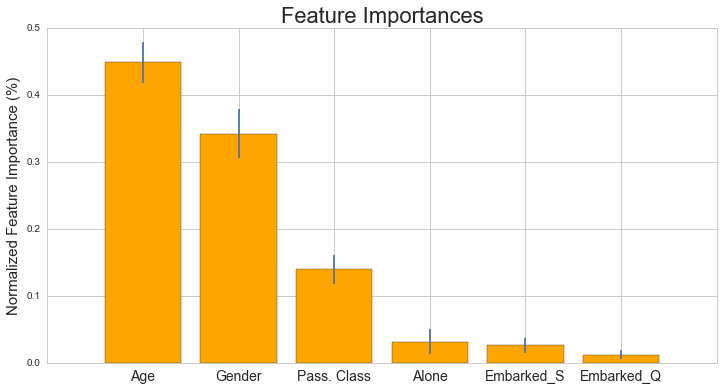

In [40]:
# Plot the feature importances of the forest
plt.figure(figsize=(12,6))
plt.title("Feature Importances", size=22)
plt.bar(range(X.shape[1]), importances[indices], color="#FFA500", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), ["Age","Gender","Pass. Class", "Alone", "Embarked_S","Embarked_Q"], size=14)
plt.ylabel('Normalized Feature Importance (%)', size=15)
plt.xlim([-1, X.shape[1]]);